#  Principal component analysis（主成分分析）

PCA是在数据集中找到“主成分”或最大方差方向的线性变换。 它可以用于降维。 在本练习中，首先负责实现PCA并将其应用于一个简单的二维数据集，以了解它是如何工作的。 我们从加载和可视化数据集开始。

### 2.1 数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

In [2]:
data = sio.loadmat('D:\\机器学习\\聚类算法\\PCA主成分分析\\ex7data1.mat')

(50, 2)


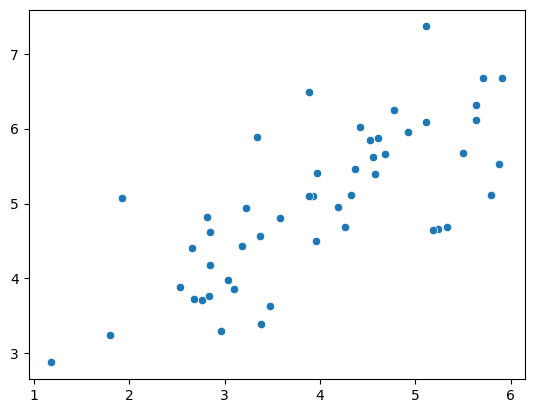

In [22]:
X = data['X']
print(X.shape)
sns.scatterplot(x = X[:,0] , y = X[:,1])
plt.show()

### 2.2 实现PCA

PCA的算法相当简单。 在确保数据被归一化之后，输出仅仅是原始数据的协方差矩阵的奇异值分解。

In [ ]:
def pca(X):
    # 归一化数据 
    X = (X - X.mean()) / X.std()
    
    # 计算协方差矩阵 covariance matrix
    X = X.values
    cov = (X.T * X) / X.shape[0]
    
    # 执行 SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [5]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

### 2.3 用PCA降低维度

现在我们有主成分（矩阵U），我们可以用这些来将原始数据投影到一个较低维的空间中。 对于这个任务，我们将实现一个计算投影并且仅选择顶部K个分量的函数，有效地减少了维数。

#### 2.3.1 把数据映射到主成分上

In [6]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [7]:
Z = project_data(X, U, 1)

#### 2.3.2 恢复数据
我们也可以通过反向转换步骤来恢复原始数据。

In [8]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [9]:
X_recovered = recover_data(Z, U, 1)

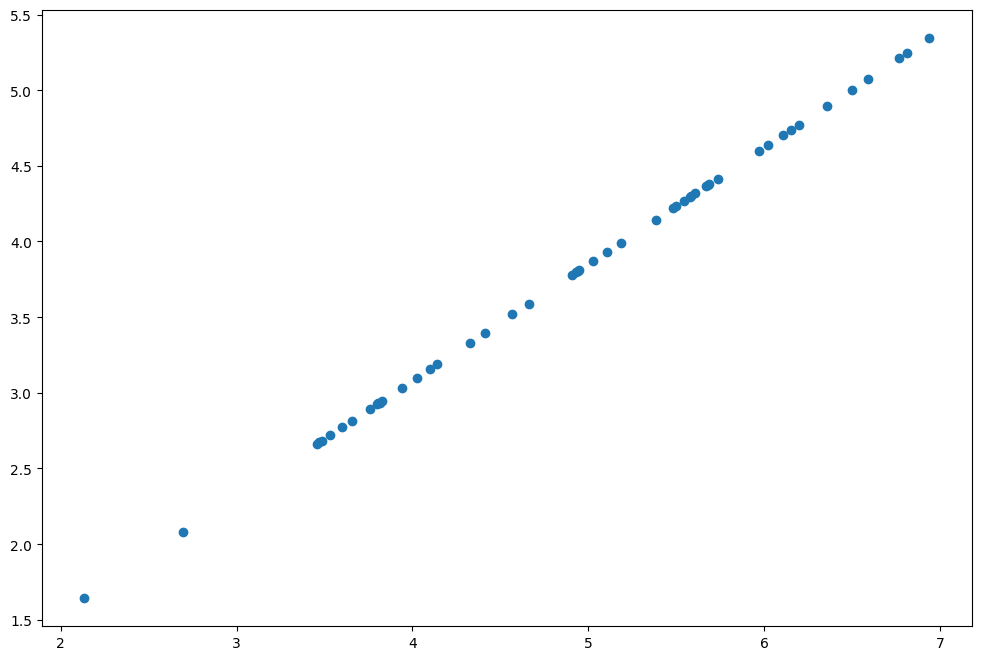

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

请注意，第一主成分的投影轴基本上是数据集中的对角线。 当我们将数据减少到一个维度时，我们失去了该对角线周围的变化，所以在我们的再现中，一切都沿着该对角线。

### 2.4 人脸图像数据集

我们在此练习中的最后一个任务是将PCA应用于脸部图像。 通过使用相同的降维技术，我们可以使用比原始图像少得多的数据来捕获图像的“本质”。

In [11]:
faces = sio.loadmat('D:\\机器学习\\聚类算法\\PCA主成分分析\\ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [12]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)).T)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


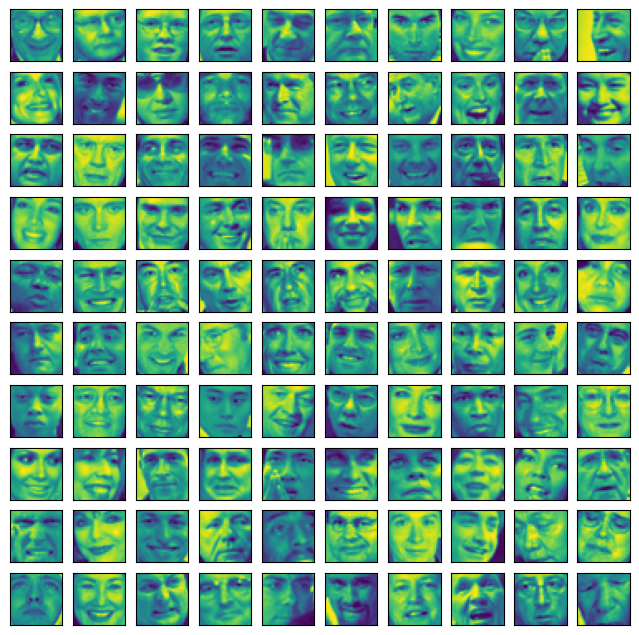

In [13]:
plot_n_image(X, 100)

练习代码包括一个将渲染数据集中的前100张脸的函数。 而不是尝试在这里重新生成，您可以在练习文本中查看他们的样子。 我们至少可以很容易地渲染一个图像。

In [14]:
face = np.reshape(X[3,:], (32, 32)).T

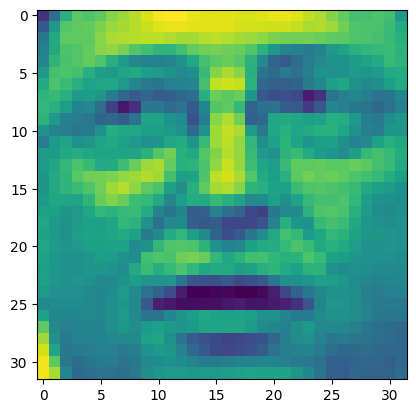

In [15]:
plt.imshow(face)
plt.show()

看起来很糟糕。 这些只有32 x 32灰度的图像（它也是侧面渲染，但我们现在可以忽略）。 我们的下一步是在面数据集上运行PCA，并取得前100个主要特征。

In [16]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

现在我们可以尝试恢复原来的结构并再次渲染。

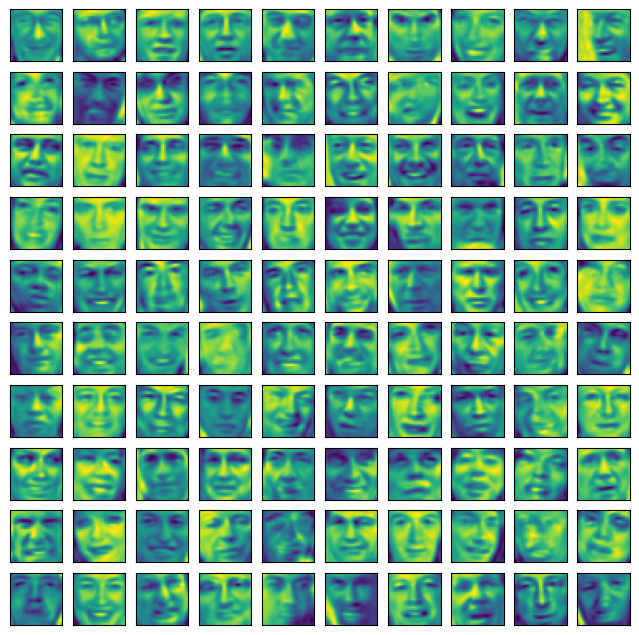

In [17]:
X_recovered = recover_data(Z, U, 100)

plot_n_image(X_recovered, 100)

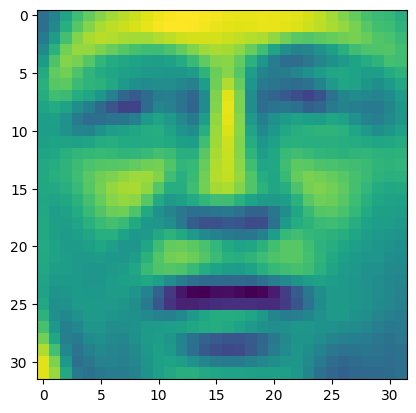

In [18]:
face = np.reshape(X_recovered[3,:], (32, 32)).T
plt.imshow(face)
plt.show()

请注意，我们失去了一些细节，尽管没有像您预期的维度数量减少10倍。
